# Imports and Mounting

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx

# Misc Methods

In [2]:
def head(a: dict, i: int) -> dict:
  return dict(list(a.items())[0:i])

In [3]:
def drawColored(G: nx.Graph, coloring: dict):
  #Create drawable color_list from coloring in the right order
  color_list = []
  for node in G.nodes:
    color_list.append(coloring.get(node))

  #Draw colored graph with color_list
  plt.figure()
  nx.draw(G, node_color=color_list, with_labels=True)
  plt.show()

In [4]:
def numberOfColors(coloring: dict) -> int:
  #Create drawable color_list from coloring in the right order
  color_list = []
  for key in coloring.keys():
    color_list.append(coloring.get(key))
  return len(set(color_list))

In [5]:
#Read reddit text file data
def readRedditData():
    file = open('data/reddit_edges.txt', 'r')
    edges = []
    for line in file.readlines():
        edges.append((line.split()[0], line.split()[1]))
    file.close()
    file = open('data/reddit_vertices.txt', 'r')
    vertices = []
    for line in file.readlines():
        vertices.append(line)
    file.close()

# Data acquisition

In [18]:
# Read the file from drive
# File can be downloaded here: https://snap.stanford.edu/data/#temporal
df = pd.read_csv('bigdata/soc-redditHyperlinks-body.tsv', delimiter="\t")

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."
...,...,...,...,...,...,...
286556,negareddit,debatefascism,68im20s,2017-04-30 16:31:26,1,"441.0,405.0,0.775510204082,0.0294784580499,0.0..."
286557,mildlynomil,justnomil,68imlas,2017-04-30 04:19:03,1,"2226.0,1855.0,0.786163522013,0.00224618149146,..."
286558,mmorpg,blackdesertonline,68ip5os,2017-04-30 16:54:08,1,"1100.0,909.0,0.778181818182,0.00181818181818,0..."
286559,electricskateboards,askreddit,68ipb2s,2017-04-30 16:41:53,1,"1876.0,1567.0,0.78144989339,0.00692963752665,0..."


In [19]:
df

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."
...,...,...,...,...,...,...
286556,negareddit,debatefascism,68im20s,2017-04-30 16:31:26,1,"441.0,405.0,0.775510204082,0.0294784580499,0.0..."
286557,mildlynomil,justnomil,68imlas,2017-04-30 04:19:03,1,"2226.0,1855.0,0.786163522013,0.00224618149146,..."
286558,mmorpg,blackdesertonline,68ip5os,2017-04-30 16:54:08,1,"1100.0,909.0,0.778181818182,0.00181818181818,0..."
286559,electricskateboards,askreddit,68ipb2s,2017-04-30 16:41:53,1,"1876.0,1567.0,0.78144989339,0.00692963752665,0..."


In [7]:
#Some pandas filtering of the data
dfBasic = df.drop(['POST_ID', 'TIMESTAMP', 'LINK_SENTIMENT', 'PROPERTIES'], axis=1)
dfEdges = dfBasic.drop_duplicates()

#Extract pandas data to simple lists
sources = dfEdges['SOURCE_SUBREDDIT'].tolist()
targets = dfEdges['TARGET_SUBREDDIT'].tolist()

In [8]:
#Get all vertices
vertices = list(set.union(set(sources), set(targets)))
len(vertices)

35776

In [9]:
print(len(vertices))
vertices[0:20]

35776


['ochelp',
 'rightsiderightside',
 'pokemonrmt',
 'weloveindiepretties',
 'rpdrofftopic',
 'unitale',
 'ac2',
 'talesfromautorepair',
 'redditworldbuilds',
 'hcfactions',
 'codependency',
 'tensorflow',
 'paulatreidesrt',
 'thelasthero',
 'roguelikes',
 'destructivereaders',
 'southernexpressions',
 'rebelgalaxy',
 'thebutton',
 'candlemaking']

In [10]:
#Get all edges
edges = []
for i in range (0, len(sources)):
  tuple = (sources[i], targets[i])
  edges.append(tuple)

In [11]:
#Remove inversed tuples 
#since our graph will not be directional, networkx would just ignore these tuples
from more_itertools import unique_everseen
edges = list(unique_everseen(edges, key=frozenset))

In [12]:
print(len(edges))
edges[0:20]

124330


[('leagueoflegends', 'teamredditteams'),
 ('theredlion', 'soccer'),
 ('inlandempire', 'bikela'),
 ('nfl', 'cfb'),
 ('playmygame', 'gamedev'),
 ('dogemarket', 'dogecoin'),
 ('locationbot', 'legaladvice'),
 ('indiefied', 'aww'),
 ('posthardcore', 'bestof2013'),
 ('posthardcore', 'corejerk'),
 ('gfycat', 'india'),
 ('metalcore', 'bestof2013'),
 ('metalcore', 'corejerk'),
 ('suicidewatch', 'offmychest'),
 ('dogecoin', 'novacoin'),
 ('gaming4gamers', 'fallout'),
 ('kpop', 'dota2'),
 ('airsoft', 'airsoftmarket'),
 ('circlebroke', 'childfree'),
 ('tribes', 'games')]

# Networkx greedy coloring and drawing

In [13]:
#Create empty graph
G = nx.Graph()

In [14]:
#Add vertices and edges
#Note that adding edges between vertices not yet in the graph will add those vertices

#G.add_nodes_from(vertices)
G.add_edges_from(edges[0:40])

print(len(G.nodes))
print(len(G.edges))

68
40


In [15]:
#Compute coloring
coloring = nx.coloring.greedy_color(G, strategy=nx.coloring.strategy_largest_first)
head(coloring, 20)

{'bestof2013': 0,
 'corejerk': 1,
 'todayilearned': 0,
 'askreddit': 1,
 'dogecoin': 0,
 'posthardcore': 2,
 'metalcore': 2,
 'funny': 0,
 'leagueoflegends': 0,
 'teamredditteams': 1,
 'theredlion': 0,
 'soccer': 1,
 'inlandempire': 0,
 'bikela': 1,
 'nfl': 0,
 'cfb': 1,
 'playmygame': 0,
 'gamedev': 1,
 'dogemarket': 1,
 'locationbot': 0}

In [16]:
numberOfColors(coloring)

3

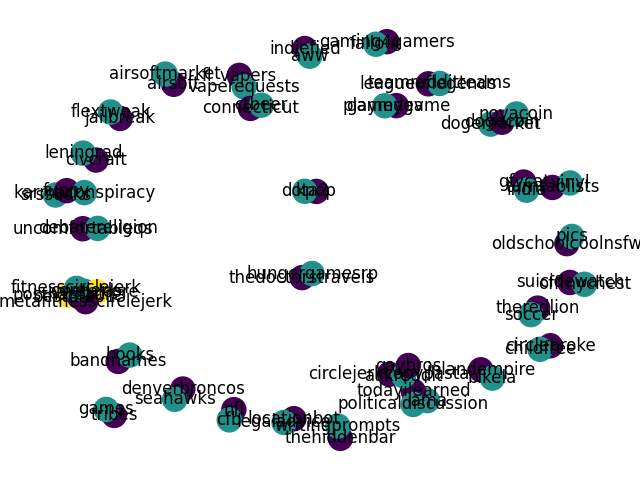

In [17]:
#Draw graph with colors
drawColored(G, coloring)